## Problem Statement
Abalone is a common name for sea snails. Determining their age is a detailed process.The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

#Importing DataCleaning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVR


#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import joblib

## Loading Dataset

In [2]:
abalone = pd.read_csv("abalone.csv")
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## About Dataset
Our Dataset is based on a regression problem, in which we have to predict the "Age" of Abalone. Age of Abalone can be determined by adding 1.5 to the Number of Rings present in an abalone.

- Label = "Age" : Rings + 1.5
- Features =
    - Sex / nominal / -- / M, F, and I (infant)
    - Length / continuous / mm / Longest shell measurement
    - Diameter / continuous / mm / perpendicular to length
    - Height / continuous / mm / with meat in shell
    - Whole weight / continuous / grams / whole abalone
    - Shucked weight / continuous / grams / weight of meat
    - Viscera weight / continuous / grams / gut weight (after bleeding)
    - Shell weight / continuous / grams / after being dried

## Exploratory Data Analysis

In [3]:
# Checking Shape of the Dataset. In our Dataset we've 4177 records with 9 fields
abalone.shape

(4177, 9)

In [4]:
# Gaining information of datatypes and null values(if any) in data set
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
# Statistical description of all the independent continuous features. Sex column is missing because it is a categorical feature
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


- Length:
    - mean : 0.5239
    - median : 0.545
    - max : 0.815
    - min : 0.075

        
- Diameter: 
    - mean : 0.4078
    - median : 0.425
    - max : 0.650
    - min : 0.055

        
- Height:
    - mean : 0.1395
    - median : 0.165
    - max : 1.130
    - min : 0


- Whole weight:
    - mean : 0.8287
    - median : 1.153
    - max : 2.825
    - min : 0


- Shucked weight:
    - mean : 0.3593
    - median : 0.5020
    - max : 1.488
    - min : 0


- Viscera weight:
    - mean : 0.1805
    - median : 0.2530
    - max : 0.760
    - min : 0


- Shell weight
    - mean : 0.2388
    - median : 0.329
    - max : 0.005
    - min : 0
    
    
- Rings:
    - mean : 9.933
    - median : 11.00
    - max : 29
    - min : 1

In [6]:
# Checking for null values
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
#Checking for duplicated rows/columns
abalone.duplicated().sum()

0

In [8]:
# Analysing Rings Columns. It ranges from  1 - 29
abalone['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

<AxesSubplot:xlabel='Rings', ylabel='count'>

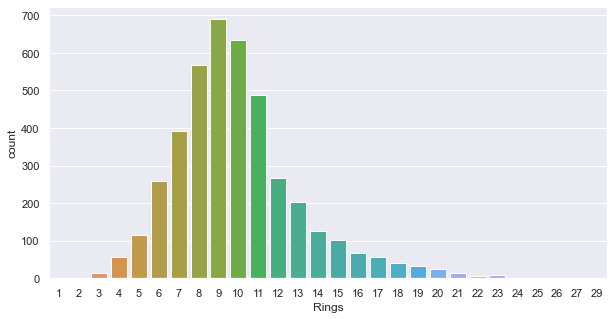

In [9]:
#Univariate Analysis
# Analysing different number count for Rings
plt.figure(figsize = (10,5))

sns.countplot(abalone['Rings'])

In [10]:
#Defining Age column
abalone['Age'] = abalone['Rings'] + 1.5
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


<AxesSubplot:xlabel='Age', ylabel='count'>

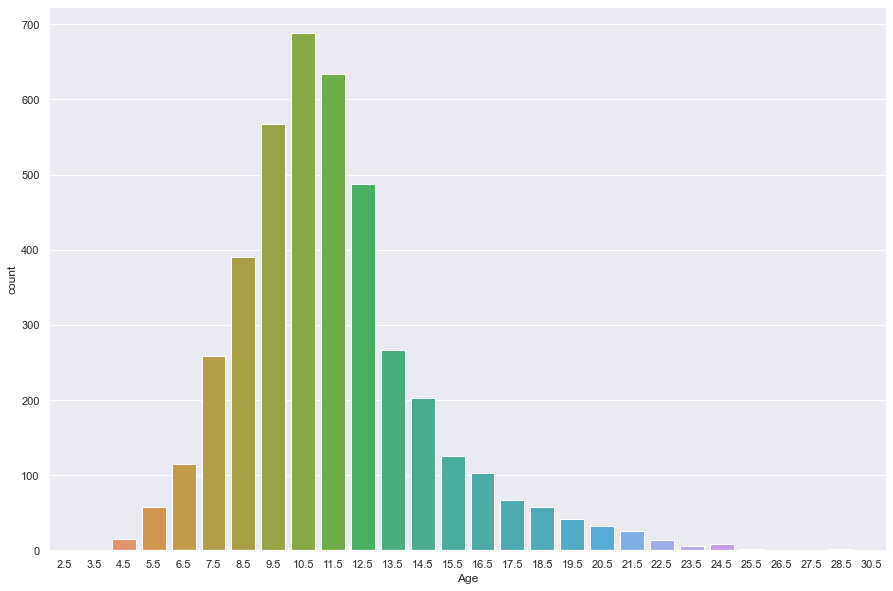

In [11]:
#Univariate Analysis
#Age column count analysis. Age of an abalone ranges from 4.5 - 24.5
plt.figure(figsize = (15,10))
sns.countplot(abalone['Age'])

In [12]:
abalone['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
3.5       1
26.5      1
27.5      1
30.5      1
2.5       1
Name: Age, dtype: int64

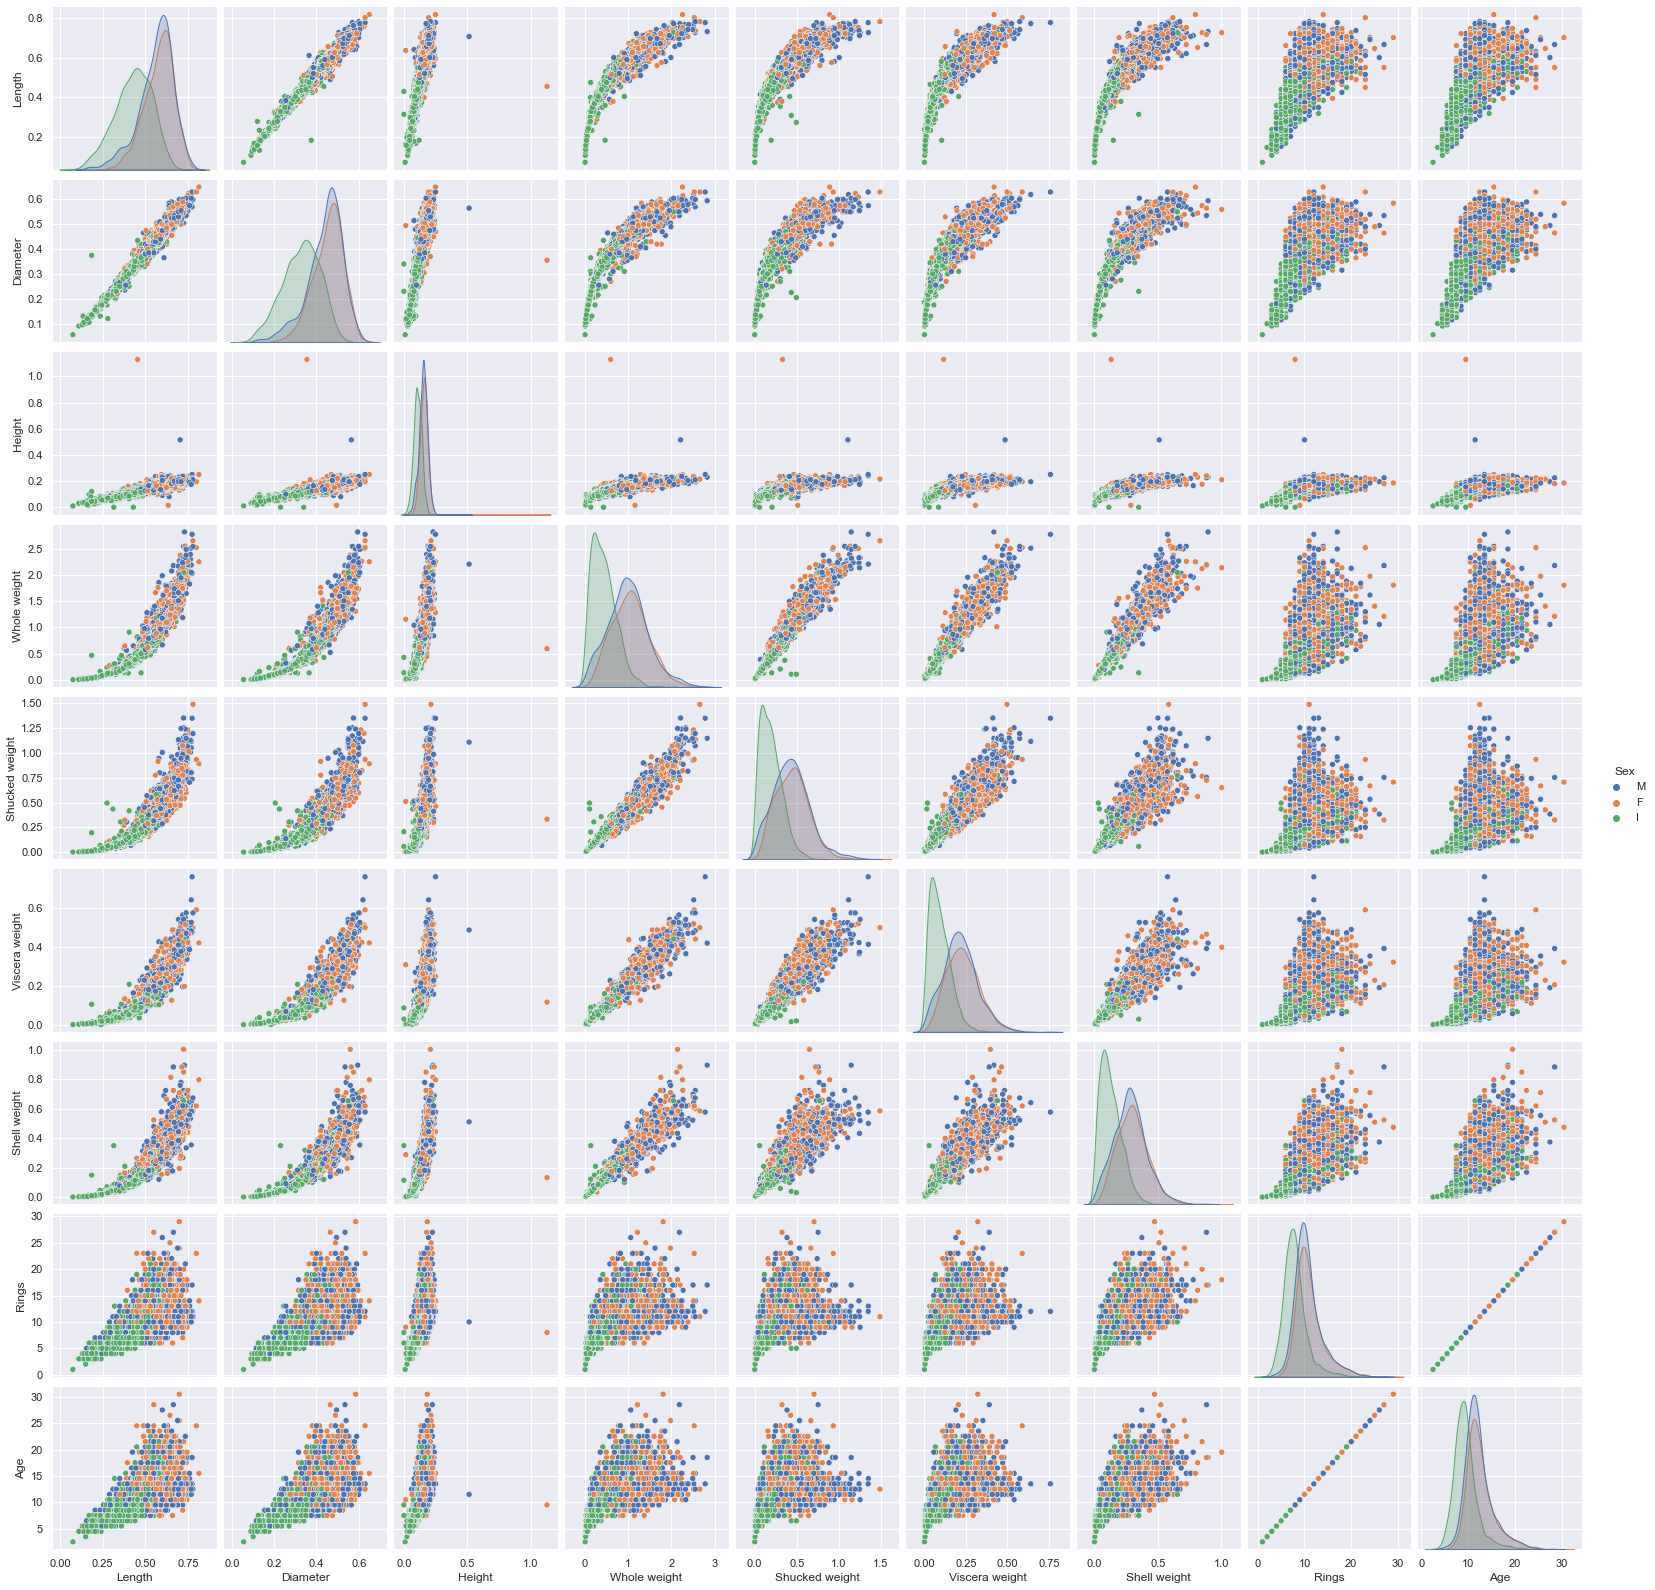

In [13]:
#Multivariate Analysis
#Plotting pairplot to get data distribution and relationship of features within features and features with label
sns.pairplot(data = abalone, hue = 'Sex')

## Conclusion :
There is a high multicollinearity within Features.

- Length/height/ diameter are very highly correlated to each other.
- Whole weight is comprised from shucked weight/viscera weight/ shell weight, therefore multicollinearity between them is peaked.
- Age is derived from Rings column therefore there's a high multicollinearity.
</br>Removing multicollinearity in our case would mean a huge amount of dataloss. Hence, we cannot remove features from the dataset.

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

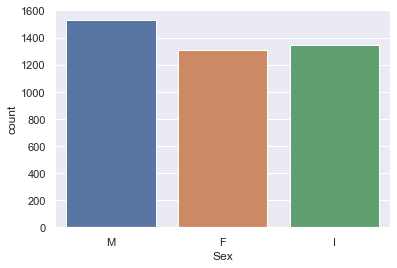

In [14]:
#Bivariate Analysis
#Analysing Categorical feature to check class imbalance. Categories are uniform and aren't imbalanced
print(abalone['Sex'].value_counts())
sns.countplot(abalone['Sex'])

<AxesSubplot:xlabel='Age', ylabel='count'>

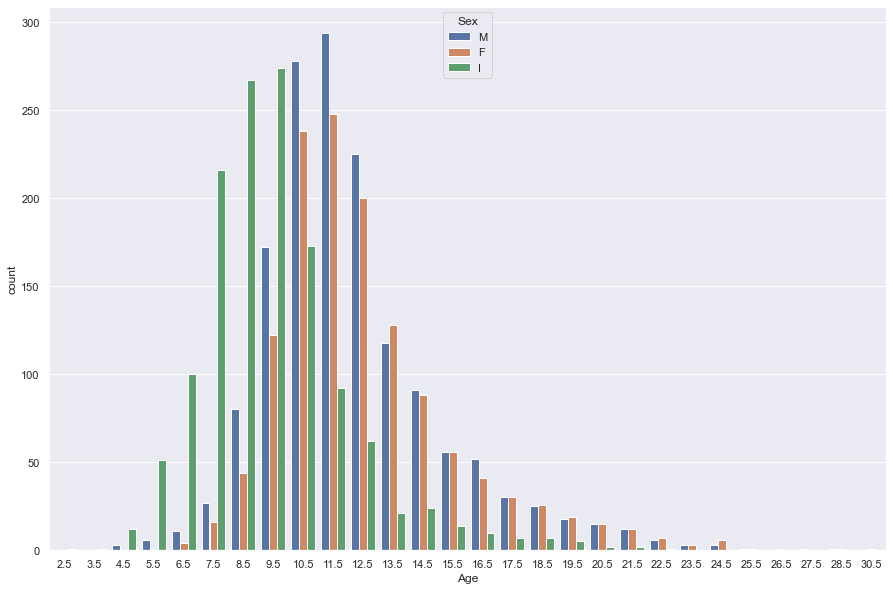

In [15]:
#Bivariate Analysis
#Analysing if Sex plays a role in Age prediction. 
plt.figure(figsize = (15,10))
sns.countplot(data = abalone,x ='Age', hue = 'Sex')

In [16]:
correlation = abalone.corr()

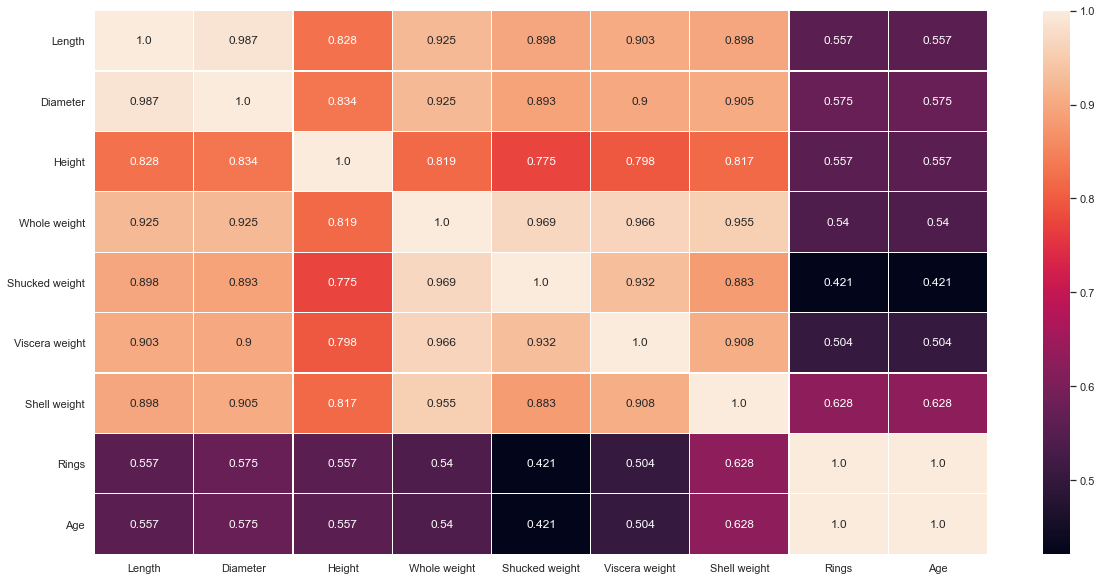

In [17]:
#Multivariate Analysis
#Checking Correlation among features
plt.figure(figsize = (20,10))
sns.heatmap(round(correlation,3), annot = True, linewidth = .2 , fmt = '1')
plt.show()

## Conclusion :
There is a high multicollinearity within Features.

- Length/height/ diameter are very highly correlated to each other.
- Whole weight is comprised from shucked weight/viscera weight/ shell weight, therefore multicollinearity between them is peaked.
- Age is derived from Rings column therefore there's a high multicollinearity.

## Data Cleaning

In [18]:
#Checking Skewness in dataset
abalone.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

<AxesSubplot:>

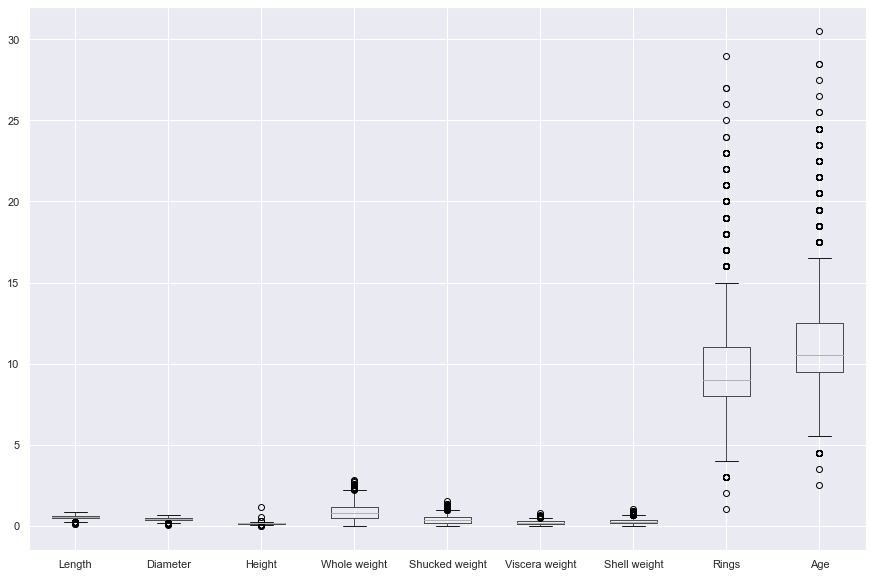

In [19]:
#multivariate Analysis
#using boxplot to visualise skewness
plt.figure(figsize = (15,10))
abalone.boxplot()

In [20]:
ab1 = pd.DataFrame({})
ab1['Length'] = np.square(abalone['Length'])
ab1['Diameter'] = np.square(abalone['Diameter'])
ab1['Height'] = np.sqrt(abalone['Height'])
ab1['Whole weight'] = np.sqrt(abalone['Whole weight'])
ab1['Shucked weight'] = np.sqrt(abalone['Shucked weight'])
ab1['Viscera weight'] = np.sqrt(abalone['Viscera weight'])
ab1['Shell weight'] = np.sqrt(abalone['Shell weight'])
ab1['Rings'] = np.sqrt(abalone['Rings'])
ab1['Age'] = np.sqrt(abalone['Age'])

In [21]:
#After Skewness Removal
ab1.skew()

Length           -0.068660
Diameter         -0.026554
Height           -0.295641
Whole weight     -0.236646
Shucked weight   -0.141443
Viscera weight   -0.183321
Shell weight     -0.222772
Rings             0.471366
Age               0.560873
dtype: float64

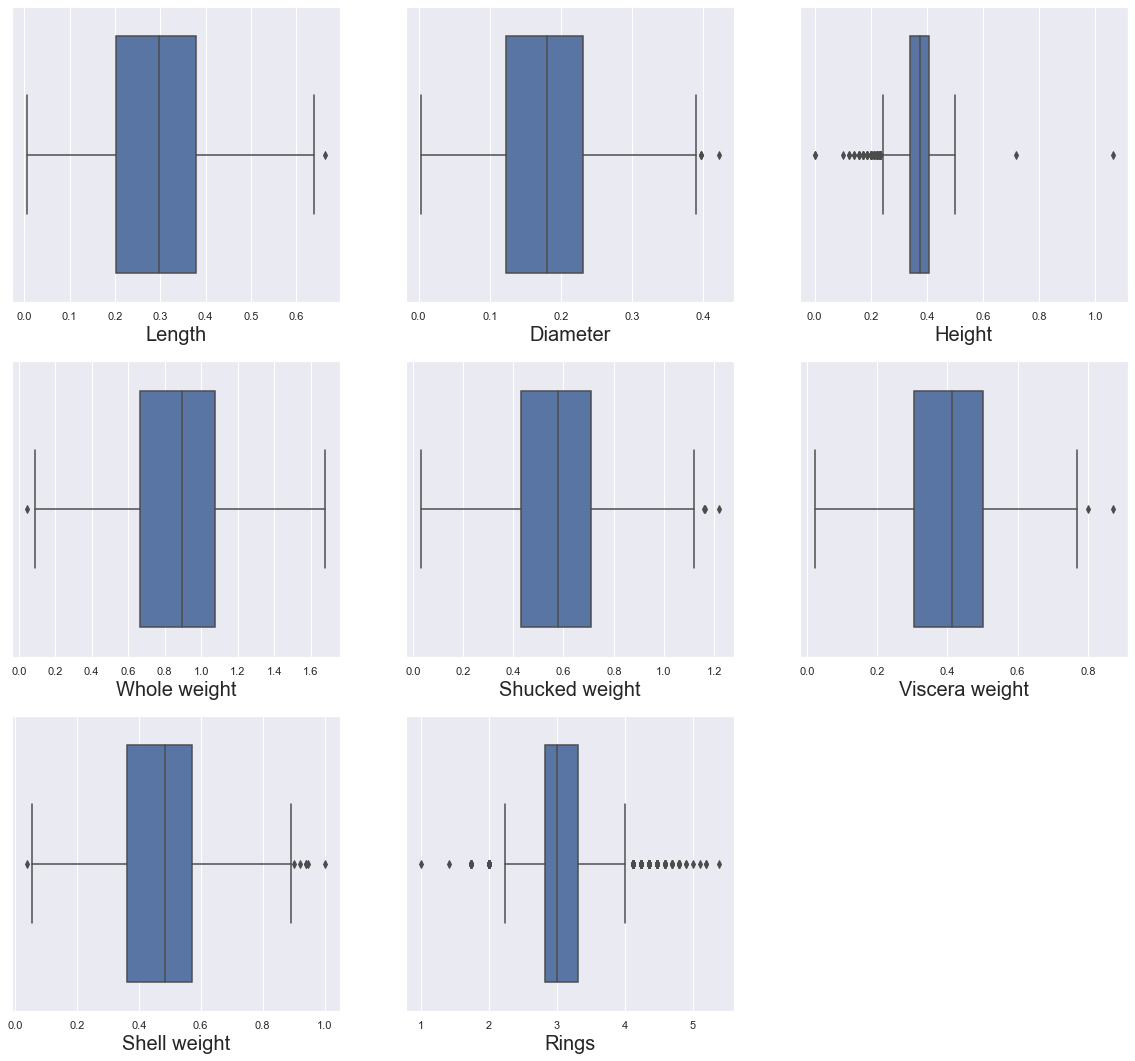

In [22]:
#Let's visulise how data is after removing skewness
plt.figure(figsize = (20,25), facecolor ='white')
plotnumber=1

for column in ab1:
    if plotnumber<9: #there are 9 columns in dataset
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(ab1[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel(Outcome,fontsize=20)
    plotnumber+=1
plt.show()  

In [23]:
#Encoding Categorical feature "Sex" before applying any model
ab1 = pd.get_dummies(abalone)
ab1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,1,0,0


## Train - Test - Split

In [24]:
#Splitting Dataset into feature and label
X = ab1.drop(columns = 'Age', axis = 0)
y = ab1['Age']

In [25]:
#Splitting dataset into 80% training and 20% test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

## Decision Tree Regressor

In [26]:
#Instantiating model
dt = DecisionTreeRegressor()

In [27]:
#Fitting model
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [28]:
#predicting X_test
y_pred = dt.predict(X_test)

In [29]:
#Applying Evaluation metrics to our Decision Tree Regressor model
print('R2 Score for Decision Tree Regressor:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Decision Tree Regressor Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Decision Tree Regressor Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Decision Tree Regressor Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score for Decision Tree Regressor: 0.9998714562043908
Mean Absolute Error for our Decision Tree Regressor Model: 0.0011961722488038277
Mean Squared Error for our Decision Tree Regressor Model: 0.0011961722488038277
Root Mean Squared Error for our Decision Tree Regressor Model: 0.03458572319330373


In [30]:
#Getting Cross-val-score to check the difference in model confidence and cross-val-score
score = cross_val_score(dt,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 100.0 %


## Linear Regression

In [31]:
#Instantiating model

Lm = LinearRegression()

In [32]:
Lm.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = Lm.predict(X_test)

In [34]:
#Applying Evaluation metrics to our Linear Regression model
print('R2 Score for Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score for Linear Regression Model: 1.0
Mean Absolute Error for our Linear Regression Model: 1.7912306406870947e-15
Mean Squared Error for our Linear Regression Model: 6.943108302172494e-30
Root Mean Squared Error for our Linear Regression Model: 2.634977856106668e-15


In [35]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(Lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on training set : ",round(Lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  100.0 %
Linear Regression Model Confidence on training set :  100.0 %


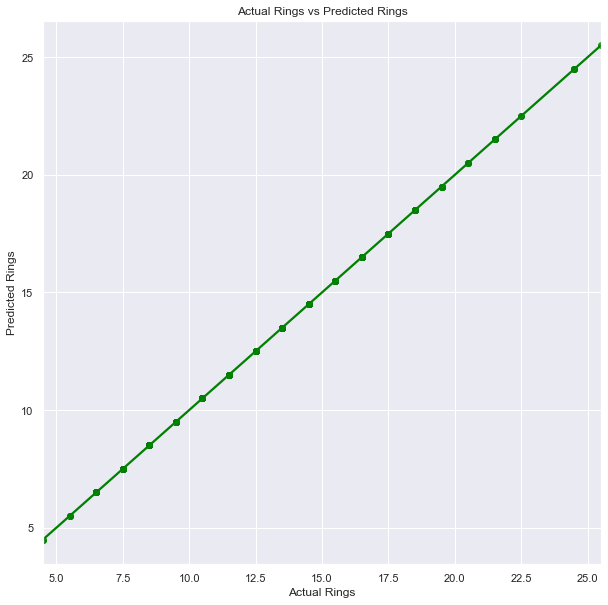

In [36]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'green')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual Rings vs Predicted Rings')
plt.show()

In [37]:
#Getting Cross-val-score to check the difference in model confidence and cross-val-score
score = cross_val_score(Lm,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 100.0 %


## Hyperparameter Tuning of Linear Regression Model

In [38]:
parameters = {'fit_intercept':[True, False],
 "normalize":[True, False],
 "copy_X":[True, False],
 "positive":[True, False]
 }
cvInstance = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = "r2")

In [39]:
cvInstance.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [40]:
cvInstance.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True, 'positive': True}

In [43]:
lm1 = LinearRegression(copy_X = True,fit_intercept = True, normalize = True, positive = False)

In [44]:
lm1.fit(X_train,y_train)

LinearRegression(normalize=True)

In [45]:
lmpred = lm1.predict(X_test)

In [46]:
#Applying Evaluation metrics to our Tuned Linear Regression model
print('R2 Score for Tuned Linear Regression Model:', r2_score(y_test,lmpred))
print('Mean Absolute Error for our Tuned Linear Regression Model:',mean_absolute_error(y_test,lmpred))
print('Mean Squared Error for our Tuned Linear Regression Model:',mean_squared_error(y_test,lmpred))
print('Root Mean Squared Error for our Tuned Linear Regression Model:',np.sqrt(mean_squared_error(y_test,lmpred)))

R2 Score for Tuned Linear Regression Model: 1.0
Mean Absolute Error for our Tuned Linear Regression Model: 2.0260242181437067e-15
Mean Squared Error for our Tuned Linear Regression Model: 9.435191616393418e-30
Root Mean Squared Error for our Tuned Linear Regression Model: 3.071675701696619e-15


In [48]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm1.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on training set : ",round(lm1.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  100.0 %
Linear Regression Model Confidence on training set :  100.0 %


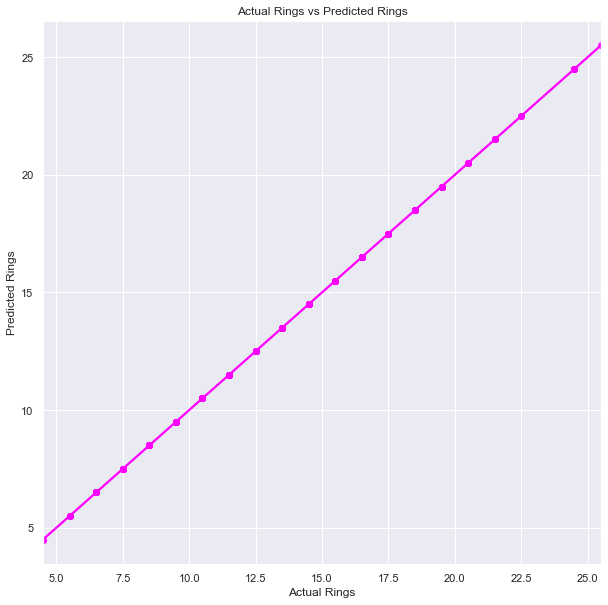

In [49]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'magenta')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual Rings vs Predicted Rings')
plt.show()

In [50]:
#Getting Cross-val-score to check the difference in model confidence and cross-val-score
score = cross_val_score(lm1,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 100.0 %


## OLS Model

In [51]:
#just Renaming column names
X1 = pd.DataFrame(ab1.rename({'Whole weight' : 'wholeWt','Shucked weight' : 'ShuckedWt','Viscera weight': 'VisceraWt','Shell weight' : 'ShellWt', 'Sex_F' : 'SexF', 'Sex_I': 'SexI', 'Sex_M': 'SexM'}, axis = 1))
X1

,Length,Diameter,Height,wholeWt,ShuckedWt,VisceraWt,ShellWt,Rings,Age,SexF,SexI,SexM
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,1,0,0


In [52]:
#Instantiating model and fitting it

OLS = smf.ols(formula = 'Rings ~ Length + Diameter + wholeWt + ShuckedWt + VisceraWt + ShellWt + Age + SexF + SexM + SexI', data = X1).fit()
OLS.conf_int()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.225e+32
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:20:31   Log-Likelihood:             1.3192e+05
No. Observations:                4177   AIC:                        -2.638e+05
Df Residuals:                    4167   BIC:                        -2.638e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1250   4.53e-16  -2.48e+15      0.000      -1.125      -1.125
Length      -1.11e-14   3.84e-15     -2.894      0.004   -1.86e-14   -3.58e-15
Diameter    1.421e-14   4.72e-15      3.012      0.003    4.96e-15    2.35e-14
wholeWt     4.441e-15   1.57e-15      2.834      0.005    1.37e-15    7.51e-15
ShuckedWt  -3.553e-15   1.85e-15     -1.918      0.055   -7.18e-15    7.86e-17
VisceraWt  -3.109e-15   2.76e-15     -1.125      0.261   -8.53e-15    2.31e-15
ShellWt     1.332e-15   2.39e-15      0.557      0.578   -3.36e-15    6.03e-15
Age            1.0000   3.27e-17   3.06e+16      0.000       1.000       1.000
SexF          -0.3750   2.07e-16  -1.81e+15      0.000      -0.375      -0.375
SexM          -0.3750   1.94e-16  -1.94e+15      0.000      -0.375      -0.375
SexI          -0.3750   1.69e-16  -2.23e+15      0.000      -0.375      -0.375
==============================================================================
Omnibus:                        3.763   Durbin-Watson:                   0.215
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.764
Skew:                          -0.073   Prob(JB):                        0.152
Kurtosis:                       2.995   Cond. No.                     7.50e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Lasso for Regularization

In [53]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

5.6498314579111316e-05

In [54]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=5.6498314579111316e-05)

In [55]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  100.0 %


In [56]:
lassopred = lasso_reg.predict(X_test)

In [57]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,lassopred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,lassopred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,lassopred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,lassopred)))

R2 Score for Tuned Lasso Regression Model: 0.999999999971932
Mean Absolute Error for our Tuned Lasso Regression Model: 1.169153603730918e-05
Mean Squared Error for our Tuned Lasso Regression Model: 2.611888429018013e-10
Root Mean Squared Error for our Lasso Linear Regression Model: 1.616133790568718e-05


In [58]:
score = cross_val_score(lasso_reg,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 100.0 %


## Partial Least Squares (PLS)

In [59]:
#Instantiating model

PLS = PLSRegression()

In [60]:
#fitting our training dataset

PLS.fit(X_train,y_train)

PLSRegression()

In [61]:
print("Model Confidence on training Dataset: ",PLS.score(X_train,y_train)*100,'%')
print("Model Confidence on test Dataset:",PLS.score(X_test,y_test)*100,'%')

Model Confidence on training Dataset:  98.72243927186959 %
Model Confidence on test Dataset: 97.54238108633302 %


In [62]:
#predictin X-test
PLSpred = PLS.predict(X_test)

In [63]:
#Applying Evaluation metrics to our PLS Regression model
print('R2 Score for PLS Regression Model:', r2_score(y_test,PLSpred))
print('Mean Absolute Error for our PLS Regression Model:',mean_absolute_error(y_test,PLSpred))
print('Mean Squared Error for our PLS Regression Model:',mean_squared_error(y_test,PLSpred))
print('Root Mean Squared Error for our PLS Regression Model:',np.sqrt(mean_squared_error(y_test,PLSpred)))

R2 Score for PLS Regression Model: 0.9754238108633303
Mean Absolute Error for our PLS Regression Model: 0.3078370690589171
Mean Squared Error for our PLS Regression Model: 0.2286952496409024
Root Mean Squared Error for our PLS Regression Model: 0.47822092137515526


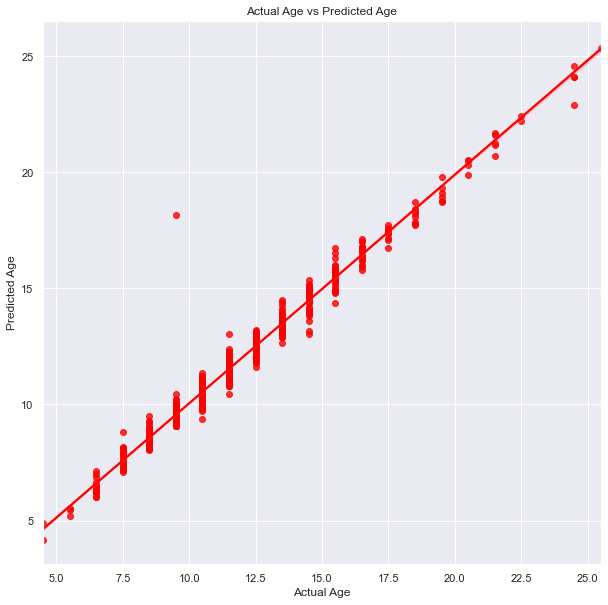

In [64]:
#Visualizing Regression Line of PLS model
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=PLSpred,data=X, color = 'red')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual Age vs Predicted Age')
plt.show()

In [65]:
score = cross_val_score(PLS,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 97.6 %


## Principal Component Analysis (PCA)

In [66]:
#Scaling X data before instantiating PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit_transform(X_scaled)

array([[-1.03106569e+00, -1.48361196e+00, -1.60840417e+00, ...,
         8.17793199e-02,  2.57052052e-02,  5.38806719e-15],
       [-3.09893326e+00, -1.54688969e+00, -1.55402491e+00, ...,
        -8.54851968e-03,  6.48049227e-04, -4.79994337e-16],
       [-2.23515510e-01,  1.48276093e+00, -1.04258642e+00, ...,
         3.59782114e-02, -5.56064930e-02, -3.49454410e-16],
       ...,
       [ 2.15771897e+00, -1.46071657e+00,  2.10899741e-01, ...,
         4.48970701e-02,  9.25458849e-03, -8.46995995e-17],
       [ 1.81235886e+00,  1.49224229e+00, -2.92042966e-01, ...,
        -3.03663832e-02,  9.65864866e-02,  7.95276364e-17],
       [ 4.88809160e+00, -1.45804353e+00,  1.08786617e+00, ...,
        -3.25410434e-02, -3.28807316e-02,  5.59342479e-17]])

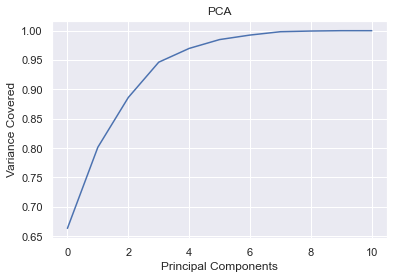

In [67]:
#Plotting dispersion of Principal Component Created by PCA
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA")
plt.show()

In [68]:
#Using 4 components to train our model to reduce dimensionality
pca = PCA(n_components = 4)
new_comp = pca.fit_transform(X_scaled)
pri_comp = pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4'])
pri_comp

,PC1,PC2,PC3,PC4
0,-1.031066,-1.483612,-1.608404,1.357583
1,-3.098933,-1.546890,-1.554025,-0.629831
2,-0.223516,1.482761,-1.042586,-0.482926
3,-1.165682,-1.499306,-1.164325,0.052264
4,-4.124516,0.187378,0.521445,0.140594
...,...,...,...,...
4172,1.107650,1.508172,-0.742176,-0.125098
4173,0.889840,-1.486922,-0.318888,-0.332828
4174,2.157719,-1.460717,0.210900,-0.637654
4175,1.812359,1.492242,-0.292043,-0.654648


In [69]:
#Splitting our principal component and label into training and testing data
x_train,x_test,y_train,y_test = train_test_split(pri_comp,y,test_size =0.30)
model = SVR()
model.fit(x_train,y_train)

SVR()

In [70]:
PCApred = model.predict(x_test)

In [71]:
#Applying Evaluation metrics to our PCA Regression model
print('R2 Score for PCA Regression Model:', r2_score(y_test,PCApred))
print('Mean Absolute Error for our PCA Regression Model:',mean_absolute_error(y_test,PCApred))
print('Mean Squared Error for our PCA Regression Model:',mean_squared_error(y_test,PCApred))
print('Root Mean Squared Error for our PCA Regression Model:',np.sqrt(mean_squared_error(y_test,PCApred)))

R2 Score for PCA Regression Model: 0.9794153965099046
Mean Absolute Error for our PCA Regression Model: 0.2356524060598974
Mean Squared Error for our PCA Regression Model: 0.20745028243262997
Root Mean Squared Error for our PCA Regression Model: 0.4554671035680074


In [72]:
#Printing model confidence on training set and testing set
print("PCA Linear Regression Model Confidence on training set : ",round(model.score(x_train,y_train)*100,2),'%')
print("PCA Linear Regression Model Confidence on training set : ",round(model.score(x_test,y_test)*100,2),'%')

PCA Linear Regression Model Confidence on training set :  98.2 %
PCA Linear Regression Model Confidence on training set :  97.94 %


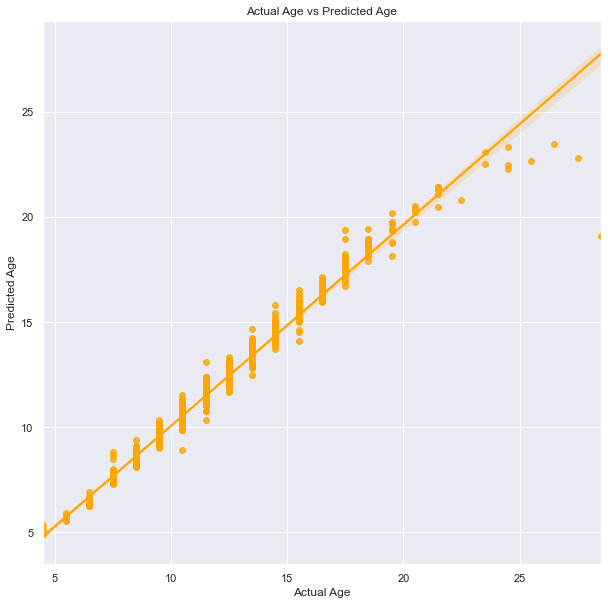

In [73]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=PCApred,data=X, color = 'orange')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual Age vs Predicted Age')
plt.show()

In [74]:
score = cross_val_score(model,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 99.8 %


## Conclusion :
After applying multiple regression models. We can finally conclude that due to high multicollinearity in our dataset almost all models are overfitting but PLS and PCA Regressor are models that are used to deal with high multicollinearity and dimensionality reduction and among them PLS is giving a better performance. So, we'll move forward to tune our SVR.

## Hyperparameter Tuning of SVR

In [75]:
params ={'kernel' :['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma' : ['scale','auto'],
        'C': [1,2,3,4,5],
        'epsilon': [0.1,0.2,0.3,0.4],
        'shrinking':['True','False'],
         'verbose': ['True','False']}

In [76]:
grid = GridSearchCV(estimator = model,param_grid= params,cv=5)

In [77]:
grid.fit(x_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

TypeError: an integer is required

In [78]:
grid.best_params_

{'C': 1,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'shrinking': 'True',
 'verbose': 'True'}

In [79]:
svr1 = SVR(kernel='linear', gamma='scale', coef0=0.0, tol=0.001, C=1.0,shrinking=True, verbose=True)

In [80]:
svr1.fit(x_train,y_train)

[LibSVM]

SVR(kernel='linear', verbose=True)

In [81]:
svr1pred = svr1.predict(x_test)

In [82]:
#Applying Evaluation metrics to our Tuned SVR model
print('R2 Score for Tuned SVR Model:', round(r2_score(y_test,svr1pred),4)*100,'%')
print('Mean Absolute Error for our Tuned SVR Model:',mean_absolute_error(y_test,svr1pred))
print('Mean Squared Error for ourTuned SVR Model:',mean_squared_error(y_test,svr1pred))
print('Root Mean Squared Error for our Tuned SVR Model:',np.sqrt(mean_squared_error(y_test,svr1pred)))

R2 Score for Tuned SVR Model: 98.86 %
Mean Absolute Error for our Tuned SVR Model: 0.2484168761654716
Mean Squared Error for ourTuned SVR Model: 0.11487785818951397
Root Mean Squared Error for our Tuned SVR Model: 0.3389363630381284


In [83]:
#Printing model confidence on training set and testing set
print("PCA tuned SVR Model Confidence on training set : ",round(svr1.score(x_train,y_train)*100,2),'%')
print("PCA tuned SVR Regression Model Confidence on training set : ",round(svr1.score(x_test,y_test)*100,2),'%')

PCA tuned SVR Model Confidence on training set :  98.47 %
PCA tuned SVR Regression Model Confidence on training set :  98.86 %


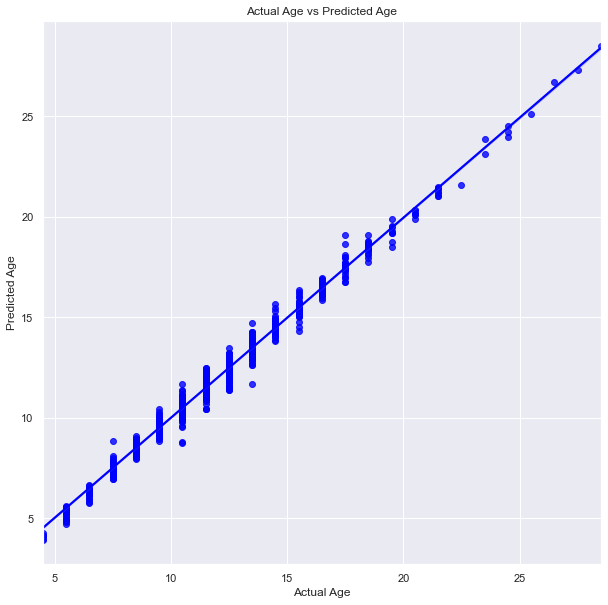

In [84]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=svr1pred,data=X, color = 'blue')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual Age vs Predicted Age')
plt.show()

## Saving Final Model

In [85]:
joblib.dump(svr1,"AbaloneAnalysisModel.pkl")

['AbaloneAnalysisModel.pkl']

## Loading Final Model

In [86]:
model = joblib.load("AbaloneAnalysisModel.pkl")

In [87]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = model.predict(x_test)
prediction = pd.DataFrame(prediction)

In [88]:
prediction

,0
0,11.554284
1,9.342525
2,11.574737
3,13.743834
4,12.359938
...,...
1249,10.937278
1250,12.478106
1251,11.456553
1252,8.591455
